In [17]:
# Basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Color detection
from sklearn.cluster import KMeans
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

# Reading and processing webcontent
from PIL import Image
import requests
from io import BytesIO
import pandas_datareader as pdr
from pandas_datareader import data, wb
import pickle
import bs4 as bs

### 1. Introduction

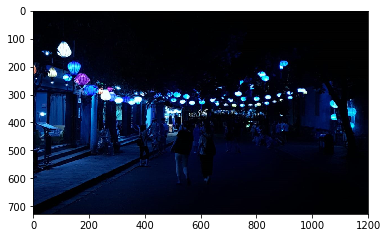

In [2]:
#Read in the image with the build in function from opencv
image = cv2.imread("hoi-ann.jpg")
#Display it with matplotlib
plt.imshow(image)

The images colors are off because opencv reads in the colors as Blue Green Red (BGR) instead of Red Green Blue (RGB).  
So in the next step we have to convert the colors:

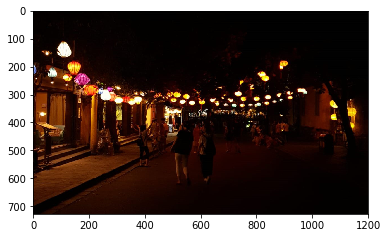

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
image.shape

(728, 1200, 3)

Shape[0] and shape[1] represent the spacial dimensions whereas shape[2] stands for the color dimensions.  
Spacial dimensions are measured in pixel. The three color dimensions are Red Green and Blue.
  
Next we need a function to convert the rgb colors to hex:

### 2. Color Conversion from RGB to HEX

In [5]:
def rgb2hex(color):
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))

<b>":02"</b> tells the format function to take atleast 2 digits and fill lacking digits with zeroes.  
<b>"x"</b> converts an integer into a lowercase hex format.
  
The Output for an rgb color hence is as follows:  

In [6]:
rgb2hex([0,160,250])

'#00a0fa'

### 3. Loading the image
The following functionn simply combines the loading and conversion functions we used earlyer:

In [7]:
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

### 4. Color detection
Now we have to detect the colors.  
Our function takes two arguments, the image and the number of colors we want to detect.  
It displays a pie chart with the colors it has found and returns their rgb values.

In [259]:
def detect_colors(img, n_colors):
    # Resize the image to decrease the amount of pixels and computational work
    mod_img = cv2.resize(img,(364, 600), interpolation = cv2.INTER_AREA)
    # Reshape the image to 2 dimensions (spacial and color) to fit the parameters of the KMeans classifier
    mod_img = mod_img.reshape(mod_img.shape[0]*mod_img.shape[1], 3)
    
    # Define number of clusters equal to given number of colors
    clf = KMeans(n_clusters = n_colors)
    #Get the color clusters in accordance to the number of defined clusters
    labels = clf.fit_predict(mod_img)
    
    # Get the count of labels
    counts = Counter(labels)
    # And the center color of each cluster
    center_colors = clf.cluster_centers_
    
    # Combine the colors in a list
    ordered_colors = [center_colors[i] for i in counts.keys()]
    # Convert the colors to hex and rgb
    hex_colors = [rgb2hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    # Show pie chart with colors:
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return hex_colors, rgb_colors

### 5. Result

The resulting piechart displays the most prominent colors found:

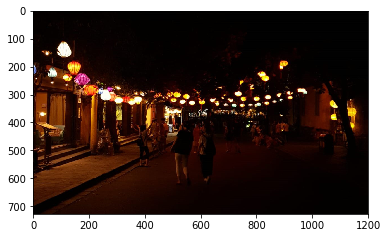

In [9]:
hoi_ann = get_img("hoi-ann.jpg")
plt.imshow(hoi_ann)

[array([7.34751561, 1.20616041, 0.65887164]),
 array([239.93586338, 233.35635674, 205.44136622]),
 array([87.60623842, 31.66095326,  8.72791847]),
 array([224.17194792, 166.83321051,  61.18889708]),
 array([39.44062884,  8.10296101,  2.63153445]),
 array([142.41225204,  70.36056009,  27.77327888])]

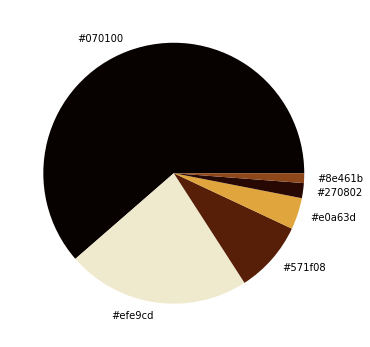

In [10]:
detect_colors(get_img("hoi-ann.jpg"), 6)

In [11]:
from PIL import Image
import requests
from io import BytesIO

In [12]:
img_url = "https://media.cntraveler.com/photos/59bb6a56e35d8f08044a32cf/master/w_820,c_limit/Rakotzbrucke-GettyImages-538162756.jpg"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

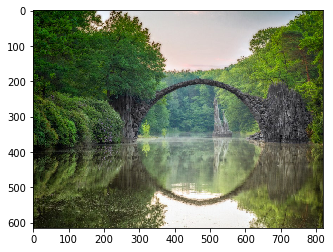

In [13]:
plt.imshow(img)

[array([26.47324767, 43.86905976, 16.4438779 ]),
 array([ 97.48694443, 120.5754751 , 106.10485657]),
 array([78.10484451, 99.35339499, 32.18376539]),
 array([172.23068717, 179.91510356, 157.03787003]),
 array([243.47520185, 241.26213694, 239.17238125]),
 array([81.32875411, 88.3304162 , 70.01048133]),
 array([217.8744011 , 209.27388286, 205.90960203]),
 array([114.45527821, 129.79699688,  63.93181227]),
 array([52.56058777, 68.05529104, 34.90700535]),
 array([137.43592212, 154.13858579, 117.57466838])]

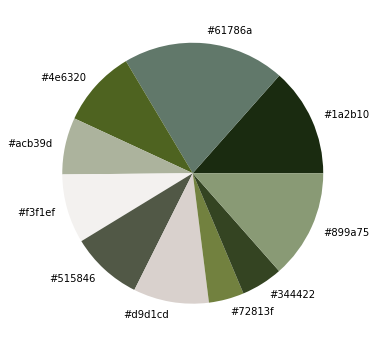

In [14]:
img = np.array(img)
detect_colors(img, 10)

[array([101.20404712, 108.0003499 ,  77.70194775]),
 array([243.6022873 , 241.59149209, 239.53826422]),
 array([37.14673034, 56.17889419, 23.47661707]),
 array([124.77827406, 145.49519636, 125.04879488]),
 array([220.17752012, 210.80453198, 207.37325286]),
 array([ 87.70464333, 118.74340011, 111.11449167]),
 array([19.73462153, 33.6879127 , 12.93945923]),
 array([53.959592  , 86.02730483, 17.29611612]),
 array([180.47559547, 184.95756866, 177.69243785]),
 array([160.69829044, 172.12427203, 129.19857223]),
 array([76.63054349, 82.83563627, 73.68798526]),
 array([57.79843632, 66.47927719, 43.72148869]),
 array([127.77832216, 142.70689359,  84.22313908]),
 array([100.20706714, 125.81118963,  35.38127208]),
 array([77.87716021, 92.35237947, 44.27967201])]

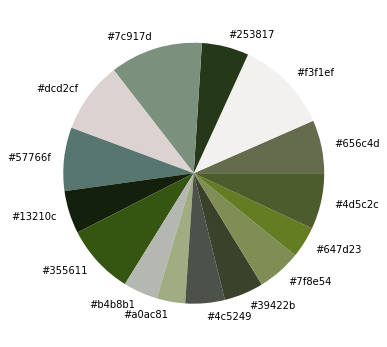

In [15]:
detect_colors(img, 15)

### 6. Color Labeling
Just some RGB value doesn't help much.  
So we are going to read in the color table from: https://cloford.com/resources/colours/500col.htm  
Then we can attribute the color names from this list to our found colors.

In [31]:
# Load color table from website
response = requests.get("https://cloford.com/resources/colours/500col.htm")
soup = bs.BeautifulSoup(response.text)

table = soup.find("table", {"class": "webcol"})

In [244]:
colors = []
hex_values = []
rgb_values = []

# Only get color name, hex values and rgb
for row in table.find_all("tr")[1:]:
    
    colors.append(row.find_all("td")[0].text)
    hex_values.append(row.find_all("td")[3].text.split("#")[1])
    
    r = int(row.find_all("td")[4].text)
    g = int(row.find_all("td")[5].text)
    b = int(row.find_all("td")[6].text)
    rgb_values.append((r,g,b))

In [245]:
# Save to pandas DataFrame
color_df = pd.DataFrame({"color": colors, "hex_value": hex_values, "rgb": rgb_values})
color_df.head()

,color,hex_value,rgb
0,indian red,B0171F,"(176, 23, 31)"
1,crimson,DC143C,"(220, 20, 60)"
2,lightpink,FFB6C1,"(255, 182, 193)"
3,lightpink 1,FFAEB9,"(255, 174, 185)"
4,lightpink 2,EEA2AD,"(238, 162, 173)"


In [246]:
# Sort so that when comparing colors we don't have to iterate over all rows
color_df.sort_values(by = "hex_value", inplace = True)
color_df.reset_index(drop = True, inplace=True)
color_df.head()

,color,hex_value,rgb
0,black*,000000,"(0, 0, 0)"
1,navy*,000080,"(0, 0, 128)"
2,blue 4 (darkblue),00008B,"(0, 0, 139)"
3,blue 3 (mediumblue),0000CD,"(0, 0, 205)"
4,blue 2,0000EE,"(0, 0, 238)"


In [247]:
# Add integer values for comparison
color_df["integer"] = color_df["hex_value"].apply(lambda x: int(x, 16))

In [248]:
color_df.head()

,color,hex_value,rgb,integer
0,black*,000000,"(0, 0, 0)",0
1,navy*,000080,"(0, 0, 128)",128
2,blue 4 (darkblue),00008B,"(0, 0, 139)",139
3,blue 3 (mediumblue),0000CD,"(0, 0, 205)",205
4,blue 2,0000EE,"(0, 0, 238)",238


### 6.1 Labeling by hex values

In [172]:
def match_color(hex):
    """Matches a given color in hex format to its nearest neighbour.
    Returns the color and its hex_value"""
    
    hex = hex.split("#")[1]
    color_int = int(hex, 16)
    int_values = color_df["integer"]
    # Largest int value in the df is 16777215
    min_diff = 17000000
    old_diff = 17000000
    
    for i in color_df.index:
        integer = color_df.loc[i, "integer"]
        diff = abs(color_int - integer)
        
        if diff < min_diff:
            min_diff = diff
            
        # As the df is ordered ascending, once the measured difference increases, the minimal distance has been found
        else :
            color = color_df.loc[i - 1, "color"]
            hex_value = color_df.loc[i-1, "hex_value"]
            return color, hex_value
            
    return null

In [158]:
color = match_color("#000080")
color

128
0


('navy*', '000080')

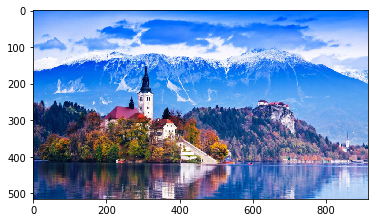

In [160]:
url = ("https://www.wallpapers13.com/wp-content/uploads/2015/12/Lake-Bled-Slovenia-Island-Castle-Mountains-Beautiful-Landscape-Wallpaper-Hd-3840x2400-915x515.jpg")
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

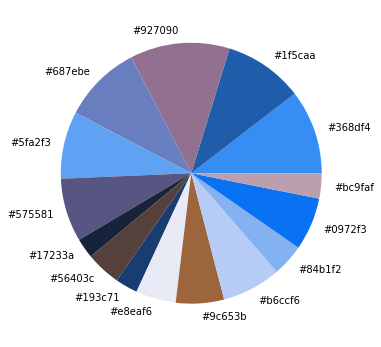

In [252]:
img = np.array(img)
hex_values, rgb_values = detect_colors(img, 15)

In [205]:
color_list= []
hex_value_list = []
display = []
for h in hex_values:
    c, h = match_color(h)
    color_list.append(c)
    hex_value_list.append("#" + h)
    display.append(1)

So lets try the color matching:

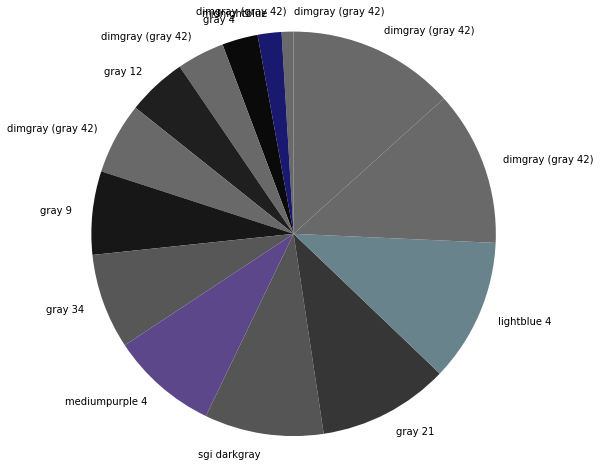

In [206]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

ax.pie(range(0, 15), labels = color_list, colors = hex_value_list, startangle = 90)
ax.axis("equal")
plt.show()

Sadly this doesn't look anything like the colors we detected.  
This is due to the fact, that the nearest color in regards to its hex value is not necessary the one looking most similiar.  <br>
<br>
So lets try comparing the colors by its rgb values next:
<br>
### 6.2 Labeling by rgb values

In [268]:
def match_colors2(rgb):
    """Matches a color in regards to its rgb values."""
    
    # Initialize minimal difference
    min_diff = 5000
    diff = 0
    rgb_df = color_df.loc[0, "rgb"]
    
    # Initialize
    color = color_df.loc[0,"color"]
    hex_value = color_df.loc[0,"hex_value"]
    
    # Compare rgb values
    for i in color_df.index:
        
        # we already compared i = 0
        rgb_df = color_df.loc[i, "rgb"]
    
        # Iterate tuple
        for x, y in zip(rgb, rgb_df):
            diff += abs(x - y)
        
        # New minimal difference color found
        if diff < min_diff:
            min_diff = diff
            color = color_df.loc[i, "color"]
            hex_value = color_df.loc[i,"hex_value"]
            
        # Reset diff
        diff = 0
            
    return color, hex_value

Try it with some sample color:

In [254]:
seagreen = (46,139,87)
match_colors2(seagreen)

'seagreen 4 (seagreen)'

Now match all colors from the last image:

In [269]:
colors = []
hex_values_matched = []

for color in rgb_values:
    
    color, hex_value = match_colors2(color)
    colors.append(color)
    hex_values_matched.append("#" + hex_value)

<function matplotlib.pyplot.show(*args, **kw)>

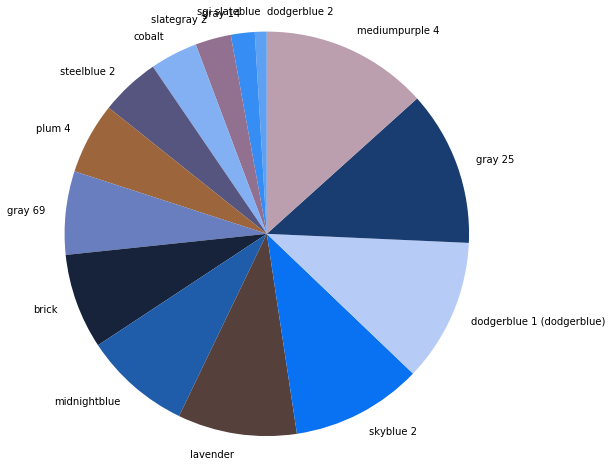

In [275]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

ax.pie(range(0,len(colors)), colors = hex_values, labels = colors, startangle = 90)
ax.axis("equal")
plt.show

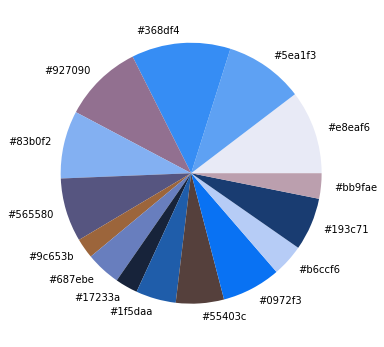

In [272]:
hex_values, rgb_values = detect_colors(img, 15)

This looks much better.  
Most of the colors match really well.  
Following is a list of the matched colors and their original hex value:

In [277]:
for x,y in zip(colors, hex_values):
    print(f"{x}, {y}")

dodgerblue 2, #e8eaf6
sgi slateblue, #5ea1f3
gray 14, #368df4
slategray 2, #927090
cobalt, #83b0f2
steelblue 2, #565580
plum 4, #9c653b
gray 69, #687ebe
brick, #17233a
midnightblue, #1f5daa
lavender, #55403c
skyblue 2, #0972f3
dodgerblue 1 (dodgerblue), #b6ccf6
gray 25, #193c71
mediumpurple 4, #bb9fae
